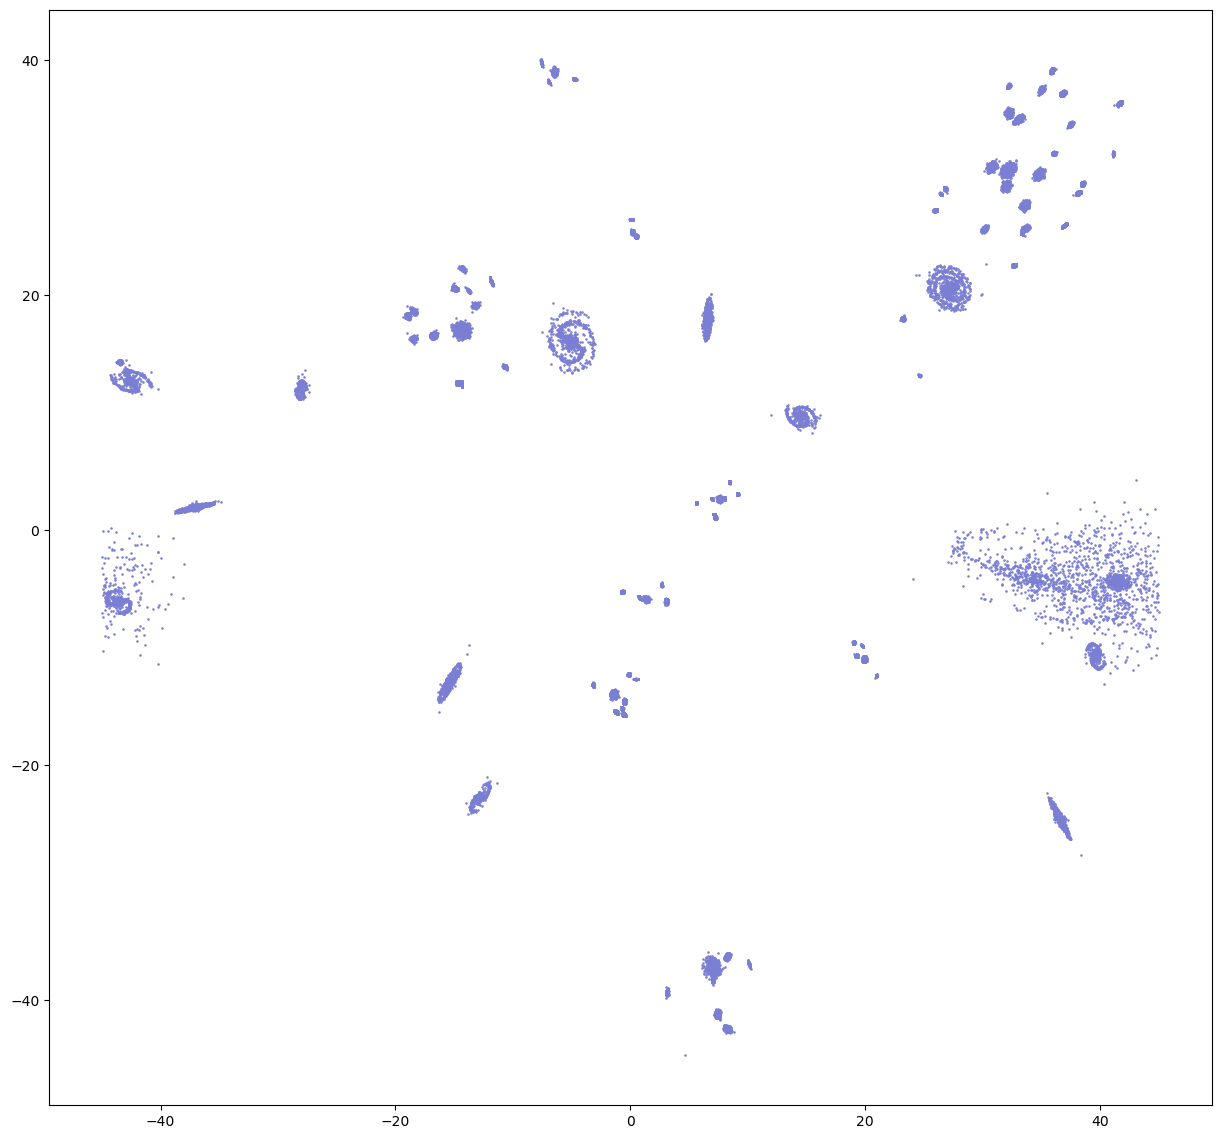

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

datapath = 'universe_8/'
stardata = pd.read_csv(datapath + '/combined_stars.csv')  

equats = stardata['X']   
polars = stardata['Y']    
parallax = stardata['Parallax']    

indexes = [i for i, x in enumerate(parallax) if x <= 0.007] 
equats = [equats[i] for i in indexes]  
polars = [polars[i] for i in indexes]

fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(equats, polars, s=0.7, c='#7b7fd4')  

#ax.set_facecolor('#6D6875')   
ax.set_aspect(1)    
plt.show()   

[ 0  0  0 ... 77 77 77]


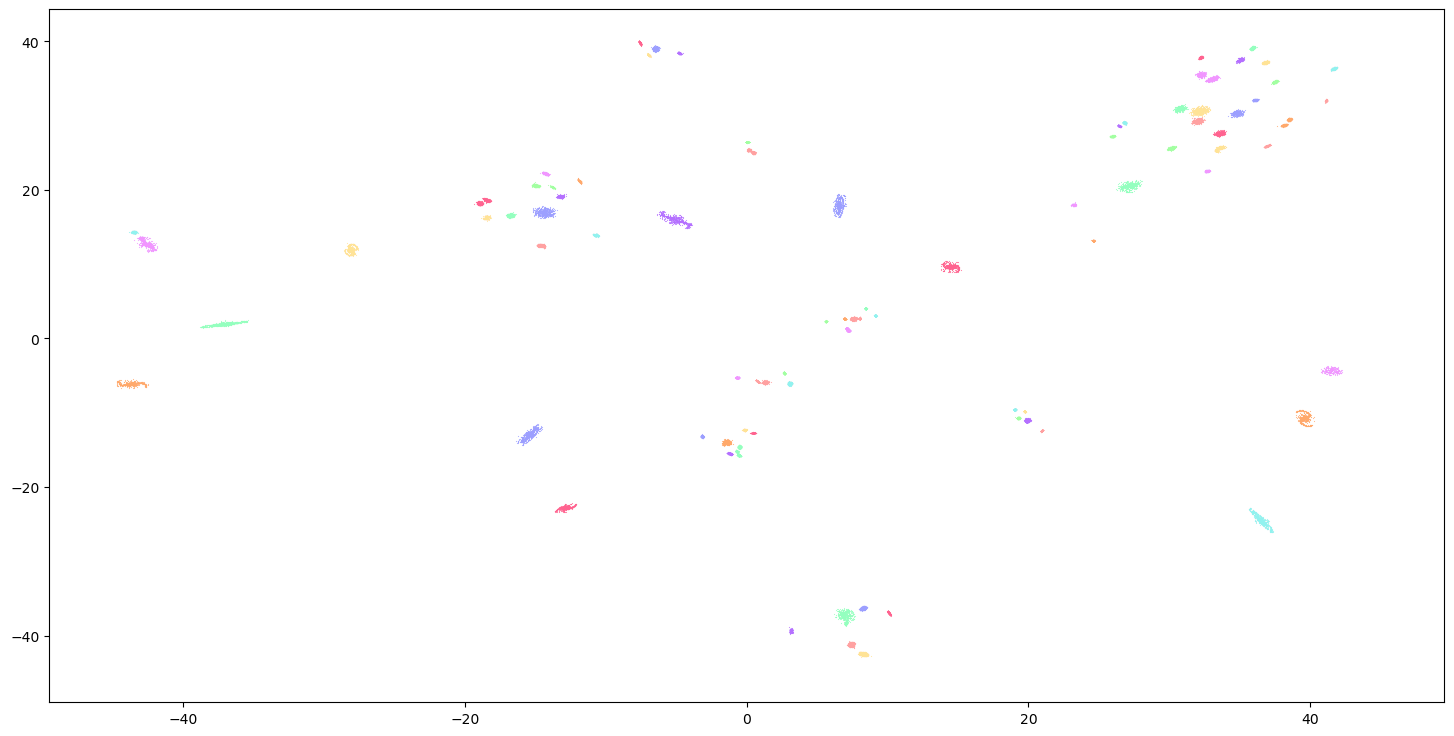

In [4]:

from sklearn import cluster
import numpy as np

coords = np.ndarray((len(equats), 2)) 
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] 

clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

labels = clustering.labels_ 
print(labels)

colours = ['#ffe396', '#ffa1a1', '#a2ffa1', '#91f2ef', '#f196ff',
          '#ffa96b', '#94ffbf', '#9c9fff', '#ff6390', '#b570ff']

fig, ax = plt.subplots(figsize=(18, 9))   

for clust in range(0, max(labels) + 1):
    colour = colours[clust%len(colours)]
    
    Xk = coords[labels == clust] 
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, color= colour, s=0.7, linewidths=0)
    
ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], c="w", alpha=0.3, s=0.02, linewidths=0) 


#ax.set_facecolor('#536b89')
plt.show()

In [5]:
import os
directory = os.path.abspath("") + f"\\{datapath}"
newdir = directory + "\\Star Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)

for clust in range(0, max(labels) + 1):

    
    
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices] 
    #print(labels)
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    data.to_csv(datapath + f'/Star Clusters/{clustername}.csv', index=None, sep=' ')    

# All galaxy clusters (close or distant)

In [6]:
positions = np.ndarray((max(labels), 3))
#print(labels)
names = np.ndarray((max(labels)), dtype=object)

for clust in range(0, max(labels)):
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices]
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1])
    meanvel = np.mean(data['RadialVelocity']) 
    positions[clust] = [xcenter, ycenter, meanvel]
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    names[clust] = clustername

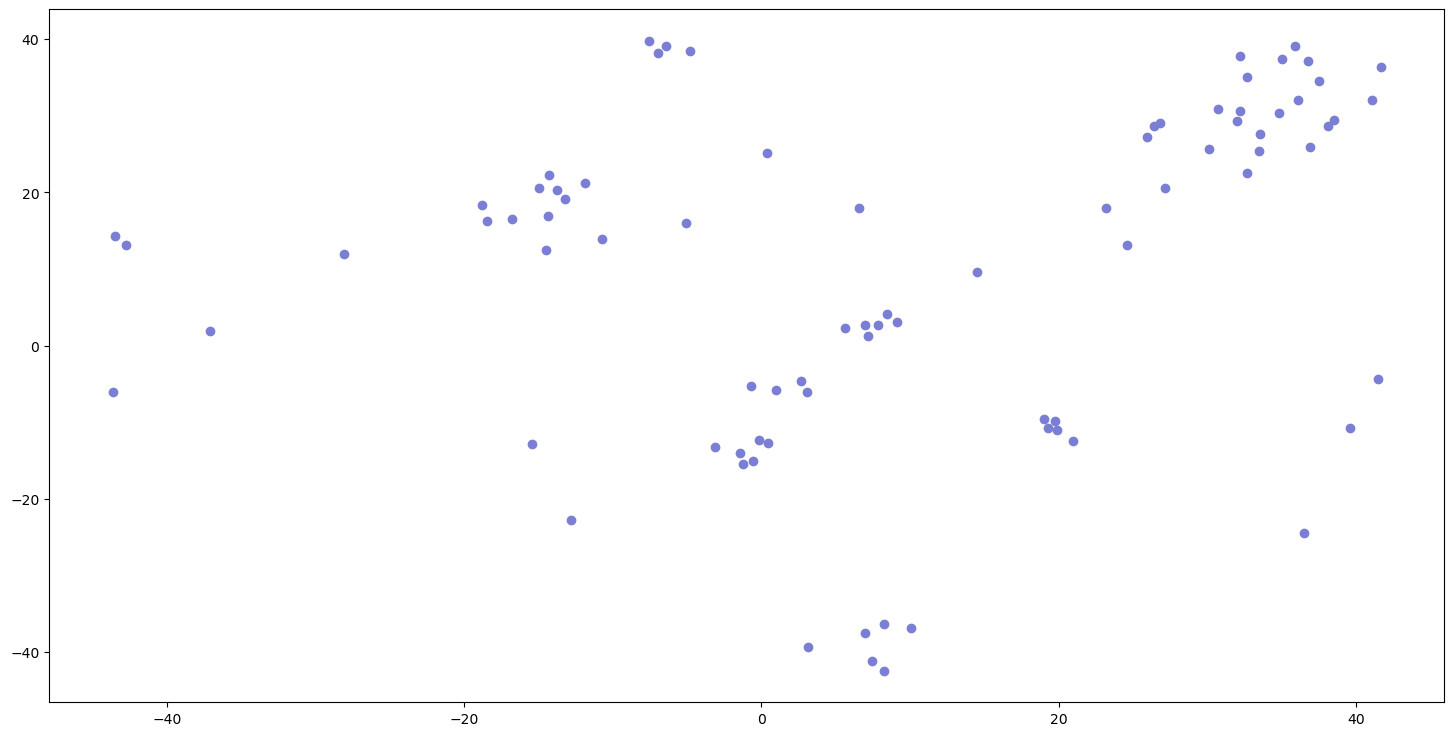

In [212]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(positions[:, 0], positions[:, 1], c='#7b7fd4')

#ax.set_facecolor('#536b89')


Text(0.5, 0.5, 'Radial Velocity (km/s)')

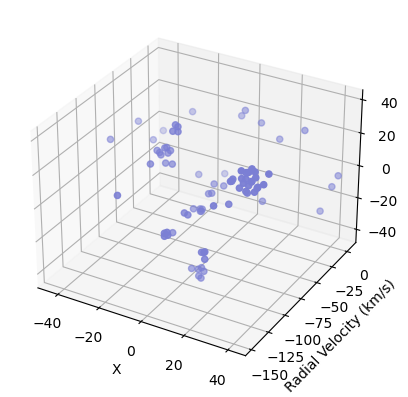

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(positions[:, 0], positions[:, 2], positions[:, 1], c = "#7b7fd4")
ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Radial Velocity (km/s)")

In [9]:

closeclusters = cluster.DBSCAN(eps=3, min_samples=2).fit(positions) 

print(len(positions))
labels = closeclusters.labels_
print(closeclusters.labels_)

82
[ 0  0  1 -1 -1  2  1  0 -1  1 -1 -1 -1 -1 -1  2  0 -1 -1  3  1 -1  3 -1
 -1 -1  4  4  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  6 -1  6  6 -1 -1  7 -1
  8  7  8  9  9 10 10 10 10 -1 11 12 -1 -1 -1 -1 12 12 11 13 13 14 14 15
 15 -1 -1 -1 -1 -1 -1 -1 -1 -1]


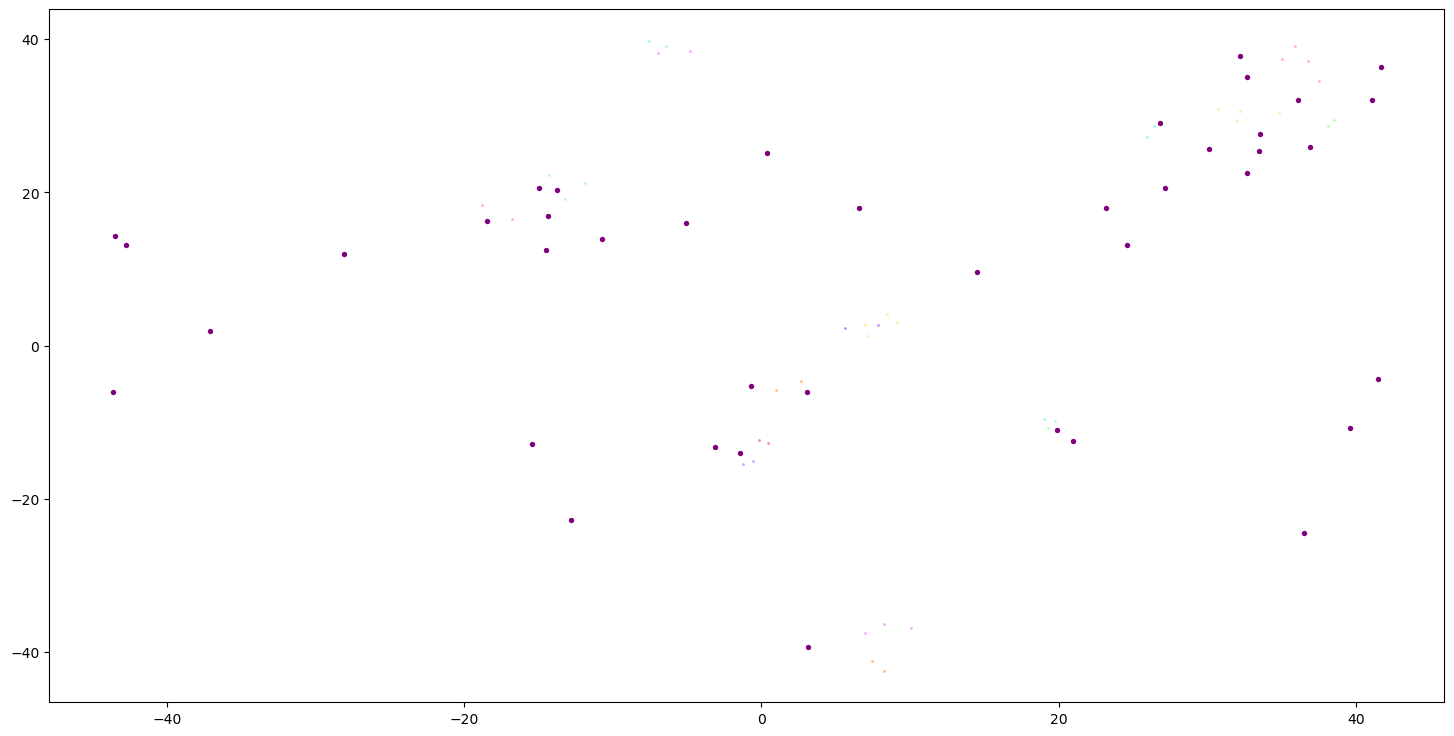

In [10]:
fig, ax = plt.subplots(figsize=(18, 9))

for clust in range(0, max(labels) + 1):
    colour = colours[clust%len(colours)]
    Xk = positions[labels == clust]
   
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c=colour, s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=15, color="purple", linewidths=0)
#ax.set_ylim(0, 180); ax.invert_yaxis(); ax.set_xlim(0, 360); ax.set_facecolor('k')
#fig.savefig('hdbscanClose.png', dpi=1500)
plt.show()

In [11]:
newdir = directory + "\\Close Galaxy Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)


for clust in range(0, max(labels) + 1):
    #print(clust)
    print(labels)
    
    Xk = positions[labels == clust] 

    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy'  
    galaxnames = names[labels == clust] 
   
    with open(datapath + f'/Close Galaxy Clusters/{clustername}.csv', 'w') as file: 
        for name in galaxnames: 
            file.write(str(name)+'\n') 

[ 0  0  1 -1 -1  2  1  0 -1  1 -1 -1 -1 -1 -1  2  0 -1 -1  3  1 -1  3 -1
 -1 -1  4  4  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  6 -1  6  6 -1 -1  7 -1
  8  7  8  9  9 10 10 10 10 -1 11 12 -1 -1 -1 -1 12 12 11 13 13 14 14 15
 15 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[ 0  0  1 -1 -1  2  1  0 -1  1 -1 -1 -1 -1 -1  2  0 -1 -1  3  1 -1  3 -1
 -1 -1  4  4  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  6 -1  6  6 -1 -1  7 -1
  8  7  8  9  9 10 10 10 10 -1 11 12 -1 -1 -1 -1 12 12 11 13 13 14 14 15
 15 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[ 0  0  1 -1 -1  2  1  0 -1  1 -1 -1 -1 -1 -1  2  0 -1 -1  3  1 -1  3 -1
 -1 -1  4  4  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  6 -1  6  6 -1 -1  7 -1
  8  7  8  9  9 10 10 10 10 -1 11 12 -1 -1 -1 -1 12 12 11 13 13 14 14 15
 15 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[ 0  0  1 -1 -1  2  1  0 -1  1 -1 -1 -1 -1 -1  2  0 -1 -1  3  1 -1  3 -1
 -1 -1  4  4  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  6 -1  6  6 -1 -1  7 -1
  8  7  8  9  9 10 10 10 10 -1 11 12 -1 -1 -1 -1 12 12 11 13 13 14 14 15
 15 -1 -1 -1 -1 -1 -1 -1 -1 

# Distant Galaxy Data

In [12]:
import glob 
k = pd.concat([pd.read_csv(file) for file in glob.glob(r'universe_8/*/Distant_Galaxy_Data.csv')])
k.to_csv("Distant_Galaxies_Combined.csv")

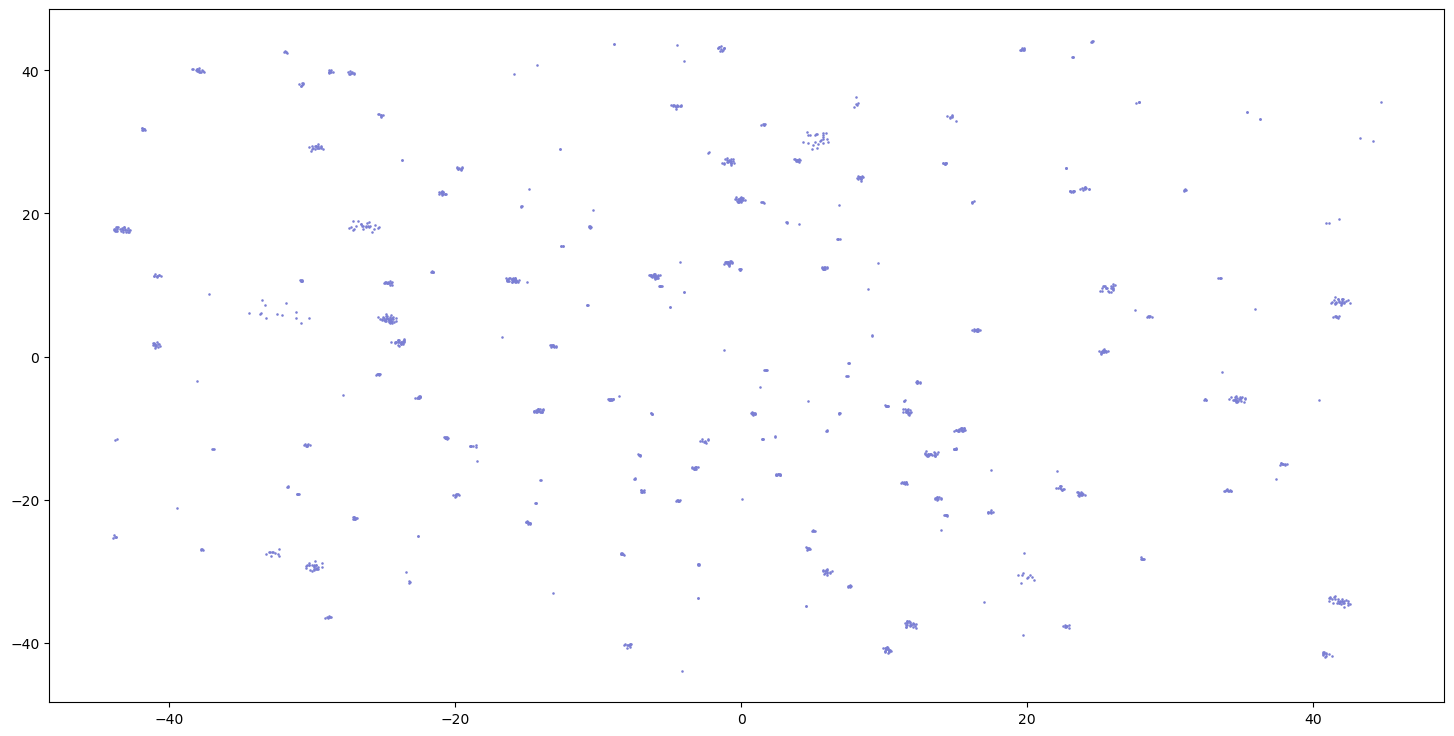

In [13]:
distantdata = pd.read_csv('Distant_Galaxies_Combined.csv')

distantequats = distantdata['X']   
distantpolars = distantdata['Y']  
#distantpar = distantdata['Parallax'] 

fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(distantequats, distantpolars, s=0.7, c='#7b7fd4')
#ax.set_facecolor('#536b89')
plt.show()  

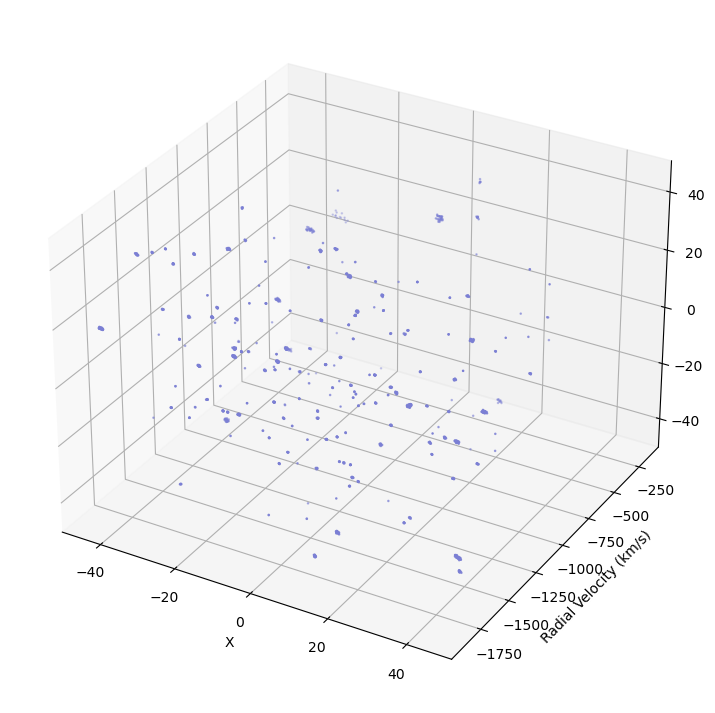

In [14]:
distantvels = distantdata['RadialVelocity']  # import the velocity data

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(distantequats, distantvels, distantpolars, s=0.7, c = "#7b7fd4")
#dist_pos = [distantequats, distantvels, distantpolars]

ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Radial Velocity (km/s)");

In [16]:
from sklearn import cluster
distantcoords = np.ndarray((len(distantequats), 3))  
for i, equat in enumerate(distantequats):
    distantcoords[i] = [equat, distantpolars[i], distantvels[i]] 


distantclusters = cluster.DBSCAN(eps=0.3, min_samples=5).fit(distantcoords)
labels = distantclusters.labels_
print(labels)

[  0   0   0 ...  -1 101  -1]


In [17]:
newdir = directory + "\\Distant Galaxy Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)
clusterCoords = np.ndarray((max(labels) + 1, 2))

rad = []
for clust in range(0, max(labels) + 1):
    indices = np.where(labels == clust)  # gets the indices of this cluster's galaxies with respect to distantdata
    data = distantdata.iloc[indices] # find the galaxies corresponding to the found indices
    
    Xk = distantcoords[labels == clust] # get the positions of all of the stars in the cluster
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) # rough center points of each cluster
    
    clusterCoords[clust] = (xcenter, ycenter)
    
    deltaX = distantcoords[clust][0] - xcenter
    deltaY = distantcoords[clust][1] - ycenter
    rad = (np.sqrt((deltaX)**2 + (deltaY)**2)) 
   
   
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy'   # generates cluster name
    # finally, write the data to a file defined by clustername
    data["Radius"] = rad
    data.to_csv(datapath + f'/Distant Galaxy Clusters/{clustername}.csv', index=None, sep=' ')    



C:\Users\neha\AppData\Local\Temp\ipykernel_25548\1787742022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Radius"] = rad
C:\Users\neha\AppData\Local\Temp\ipykernel_25548\1787742022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Radius"] = rad
C:\Users\neha\AppData\Local\Temp\ipykernel_25548\1787742022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [18]:
rings = 12
height = 180 / rings      
ringArea = 4 * np.pi / rings       # each ring should have same area 
upper = np.pi / 2      # starts with the upper bound of the graph at pi/2 radians (north pole)

rects = []; antirects = []; totCellCounts = []  #initialise lists to store data in, to then graph later

# First, iterate over the northern hemisphere's rings, with an "antipolar" calculation done for the southern hemisphere
for ring in range(1, int((rings / 2) + 1)):       
    centralLat = upper - ((height / 2) * np.pi / 180)      
    dLi = height * (1 / np.cos(centralLat))        
    # since all rings are equal in height, the lower bound of the ring is the upper bound, minus delta height of each ring
    lower = upper - (height * np.pi / 180)         
    # now, convert the upper bound in radians to the desired coordinate system (degrees, with 0 deg at north pole)
    PolarUpper = abs((180 / np.pi) * (upper - np.pi / 2))   
    PolarLower = PolarUpper + height    # as above, but for the lower bound
    AntiPolarU = 180 - PolarLower       # finds upper bound of southern hemisphere cell
    AntiPolarL = AntiPolarU + height    # as above, but lower bound
    cells = int(round(360 / dLi))     # finds an integer number of cells to subdivide the equatorial axis into
    
    for i in range(0, cells):       # now to check how many galaxy clusters are in each cell in this ring
        cellLeft = i * 360 / cells      # finds left bound of the current cell
        cellRight = cellLeft + 360 / cells          # finds right bound of the current cell
        CellCount = 0; AntiCellCount = 0;       # initializes variables for the number of clusters in each cell
        for cluster in clusterCoords:       # iterates over all galaxy clusters to check if it's in this cell
            x, y = cluster
            if (cellLeft <= x <= cellRight) and (PolarUpper <= y <= PolarLower):  # check if cluster is in this cell
                CellCount += 1      # add a tally to the northern hemisphere counter
            elif (cellLeft <= x <= cellRight) and (AntiPolarU <= y <= AntiPolarL):  # check if cluster is in the anti-cell
                AntiCellCount += 1       # add a tally to the southern hemisphere counter
        # now, add counts to a list (for colour normalization later on)
        totCellCounts.append(CellCount); totCellCounts.append(AntiCellCount)        
        Rwidth = cellRight - cellLeft       # width of rectangle cell
        Rheight = PolarUpper - PolarLower   # height of rectangle cell\
        # finally, add the rectangle properties to a list to plot later
        rects.append((cellLeft, PolarLower, Rwidth, Rheight, CellCount))       
        antirects.append((cellLeft, AntiPolarL, Rwidth, Rheight, AntiCellCount))# as above, for southern rectangles   
    upper = lower       # changes upper bound for next ring into lower bound of current ring
  

C:\Users\neha\AppData\Local\Temp\ipykernel_25548\1780430553.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("BuPu")
C:\Users\neha\AppData\Local\Temp\ipykernel_25548\1780430553.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


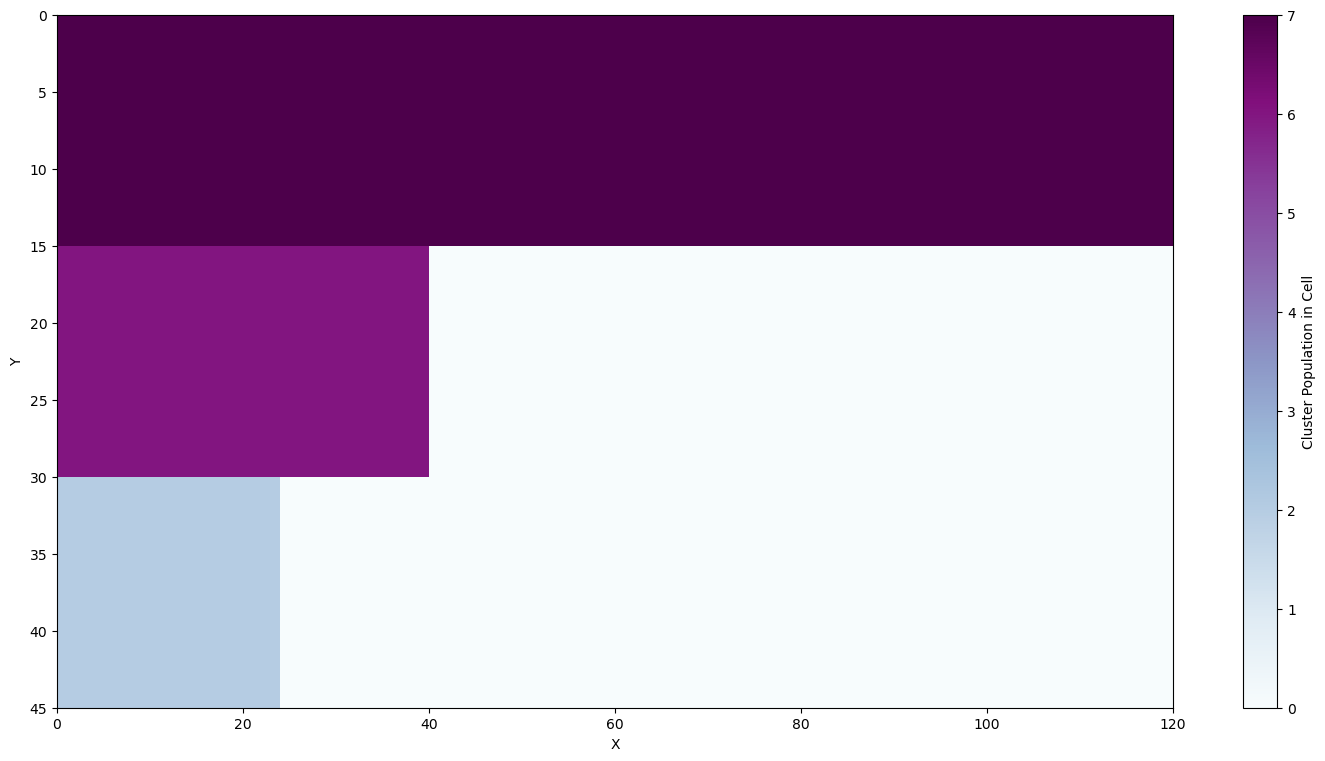

In [19]:
import matplotlib.patches as patches
import matplotlib.colors as colours

fig, ax = plt.subplots(figsize=(18, 9))
cmap = plt.cm.get_cmap("BuPu")
ColourNorm = colours.Normalize(vmin = 0, vmax = max(totCellCounts))     

for rect in rects:    
    cellLeft, PolarLower, Rwidth, Rheight, CellCount = rect          
    rectangle = patches.Rectangle(xy=(cellLeft, PolarLower), width=Rwidth, height=Rheight, 
                                  facecolor=cmap(ColourNorm(CellCount)), fill=True)
    ax.add_patch(rectangle)         # plots the rectangle on the figure
for rect in antirects:      # as above but for the southern hemisphere
    cellLeft, PolarLower, Rwidth, ARheight, CellCount = rect
    rectangle = patches.Rectangle(xy=(cellLeft, PolarLower), width=Rwidth, height=ARheight, 
                                  facecolor=cmap(ColourNorm(CellCount)), fill=True)
    ax.add_patch(rectangle)

ax.set_xlabel("X"); ax.set_ylabel("Y");
ax.set_xlim([0, 120]); ax.set_ylim([0, 45]);
ax.invert_yaxis()       #flip the axis to match the coordinate system

# and finally to create a colourmap for the cells
sm = plt.cm.ScalarMappable(cmap=cmap, norm=ColourNorm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cluster Population in Cell', rotation=90)
#fig.savefig('Isotropy.png', dpi=1500)

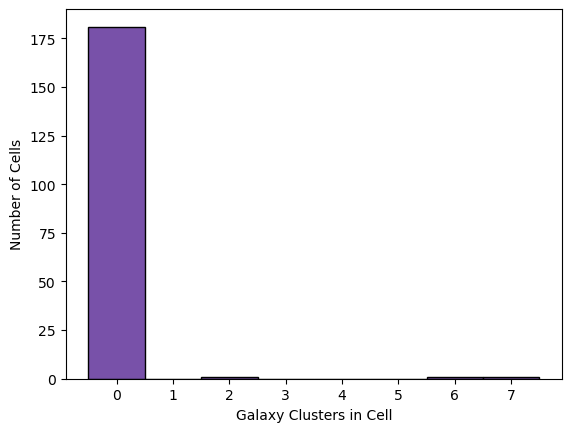

In [25]:
fig, ax = plt.subplots()
plt.hist(totCellCounts, bins=np.arange(0, max(totCellCounts) + 2, 1) - 0.5, edgecolor='k', color="#7851A9")
ax.set_xlabel("Galaxy Clusters in Cell"); ax.set_ylabel("Number of Cells");